#                       BIG MART SALES PREDICTION

# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Importing Libraries

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics
import statsmodels.api as sm

# Loading the Dataset

In [98]:
#importing test and train data
df_train=pd.read_csv("C:\\Users\\HP\\Desktop\\Capstone Project\\train.csv")
df_test=pd.read_csv("C:\\Users\\HP\\Desktop\\Capstone Project\\test.csv")

In [99]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Exploratory data Analysis

In [101]:
print('Train_data:',df_train.shape)
print('Test_data:',df_test.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


In [102]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [103]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [104]:
df_train['source'] = 'train'
df_test['source'] = 'test'
df=pd.concat([df_train,df_test], ignore_index=True)

In [105]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [106]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [107]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Observations:

The missing values of the Item_Outlet_Sales are from the test dataset.

The missing values of Item_Weight and Outlet_Size need to be imputed.

In [108]:
df.shape

(14204, 13)

Duplicates

In [109]:
#Checking for the duplicates
idsUnique = len(set (df_train.Item_Identifier))
idsTotal = df_train. shape[0]
idsDuplicates = idsTotal- idsUnique
print("There are "+ str(idsDuplicates) + " duplicate IDs for "+ str(idsTotal) +" total entries")

There are 6964 duplicate IDs for 8523 total entries


In [110]:
#Checking for the Missing values
print("=>> Missing values ");
print(df_train.isnull().sum())

=>> Missing values 
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64


- Item_Identifier has 1463 missing values.
- Outlet_size has 2410 missing values

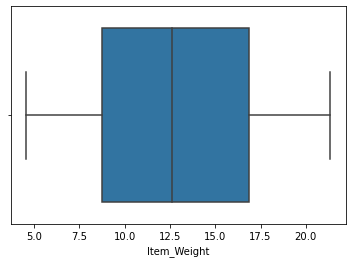

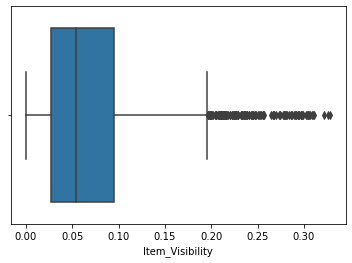

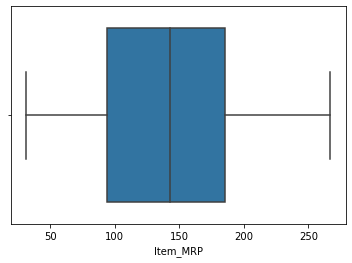

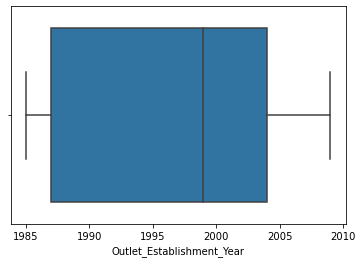

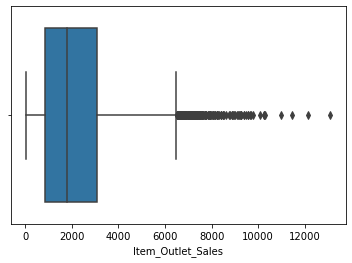

In [111]:
#Checking for the outliers
for i in df_train.describe().columns:
  sns.boxplot(df_train[i].dropna())
  plt.show()

# Univariate Analysis

To begin, we will plot and explore all of the individual variables in order to gain some insights.

Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

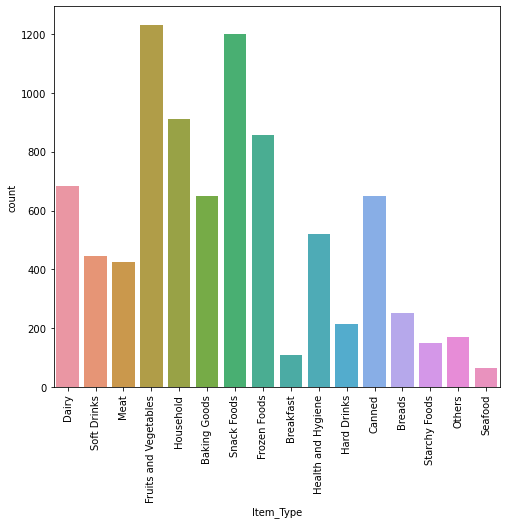

In [112]:
#Distribution of the variable Item_Type
plt.figure(figsize=(8,7))
sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90)

From the above plot,we can say that, it has 16 different types and there is a possibility to reduce the Item_types to <16

In [113]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

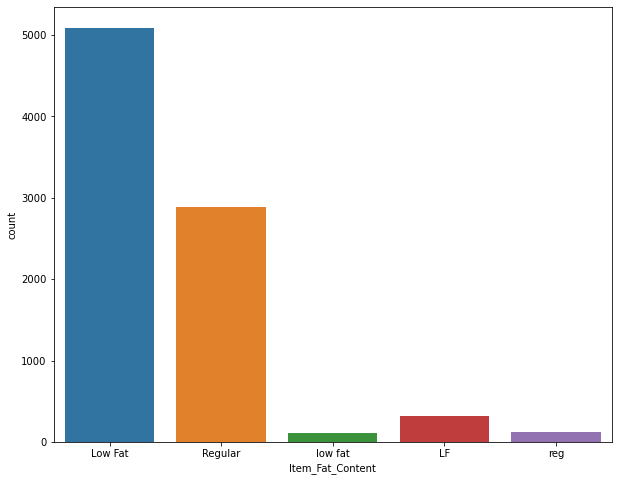

In [114]:
#Distribution of the Item_Fat_Content
plt.figure(figsize=(10,8))
sns.countplot(df_train.Item_Fat_Content)

In the diagram above, 'LF,' 'low fat,' and 'Low Fat' are all the same category and can be combined. Similarly, we can combine'reg' and 'Regular' into one word.

Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

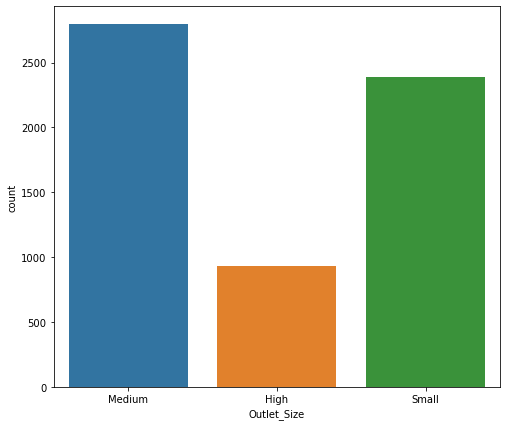

In [115]:
#Distribution of the outlet_Size
plt.figure(figsize=(8,7))
sns.countplot(df_train.Outlet_Size)

From the above diagram, we can say that it has more number of Medium and small size outlets.
And has less number of High size outlets.

In [116]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

 Outlet_Location_Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

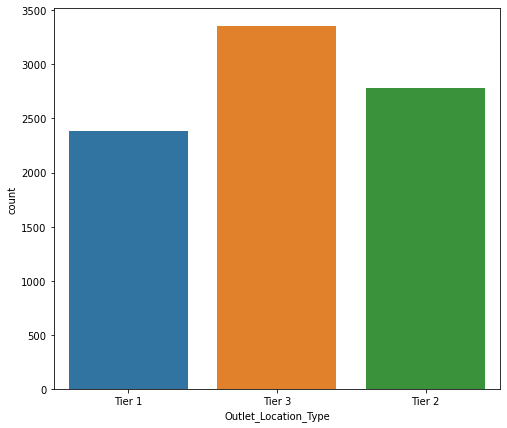

In [117]:
#Distribution of the Outlet_Location_Type
plt.figure(figsize=(8,7))
sns.countplot(df_train.Outlet_Location_Type)

From the diagram above,the Bigmart is present in Tier 2 & Tier 3 than in Tier 1 cities.

In [118]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

 Outlet_Type

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

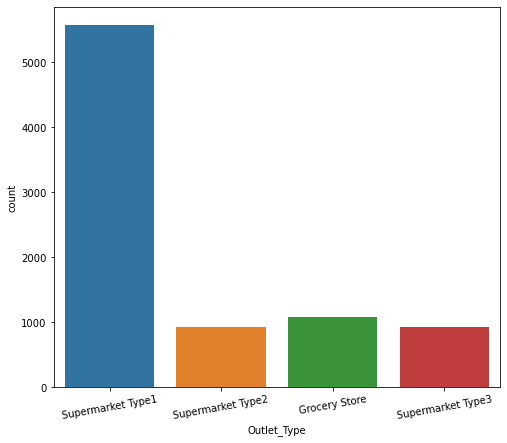

In [119]:
#Distribution of the Outlet_Type
plt.figure(figsize=(8,7))
sns.countplot(df_train.Outlet_Type)
plt.xticks(rotation=10)

In the diagram above,supermarket Type1 is prominent and the other three types are of same size.

In [120]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# Bi-Variate Analysis

After going over each feature individually, let's go over them again in relation to the target variable.

# Individual Feature VS Target

Item_Weight VS Item_Outlet_Sales Analysis

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

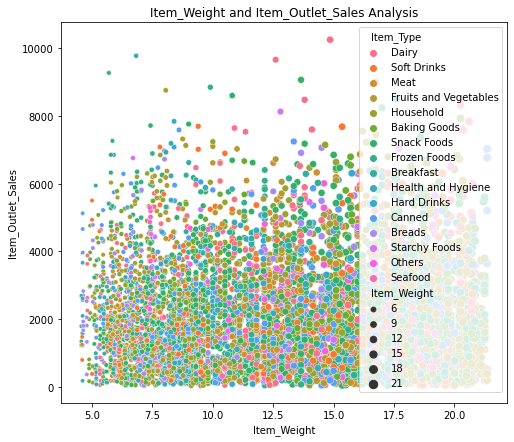

In [121]:
# Item_Weight VS Item_Outlet_Sales Analysis
plt.figure(figsize=(8,7))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=df_train)


Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any specific pattern

 Maximum Retail Price Vs Item_Outlet_Sales

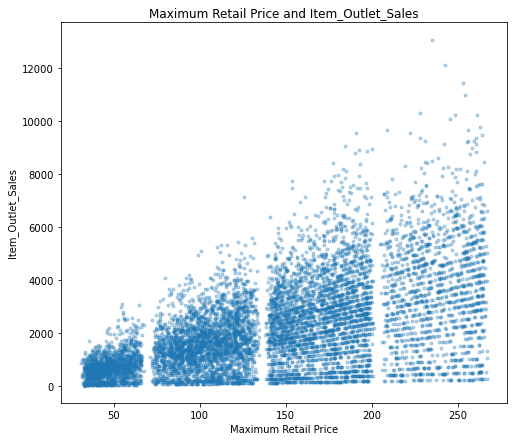

In [122]:
# Maximum Retail Price Vs Item_Outlet_Sales
plt.figure(figsize=(8,7))
plt.xlabel('Maximum Retail Price')
plt.ylabel('Item_Outlet_Sales')
plt.title('Maximum Retail Price and Item_Outlet_Sales')
plt.plot(df_train.Item_MRP,df_train.Item_Outlet_Sales, ".",alpha = 0.3)

- Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

Item_Visibility vs Item_Outlet_Sales

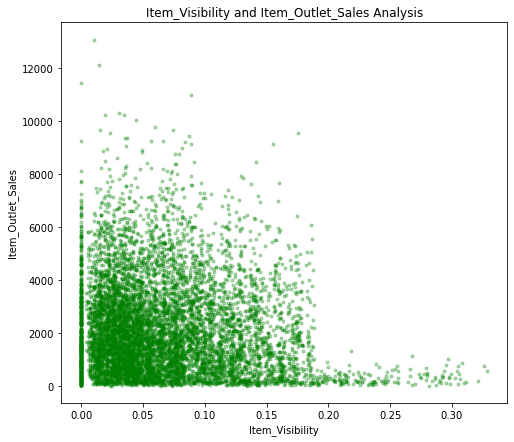

In [123]:
#Item_Visibility vs Item_Outlet_Sales
plt.figure(figsize=(8,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(df_train.Item_Visibility,
        df_train["Item_Outlet_Sales"],'.',
        alpha = 0.3,color='green')


There is a string of points at Item Visibility = 0.0 in the Item Visibility vs Item Outlet Sales graph, which appears strange because item visibility cannot be completely zero. We will take note of this issue and address it in the future.

Outlet_Establishment_Year vs Item_Outlet_Sales

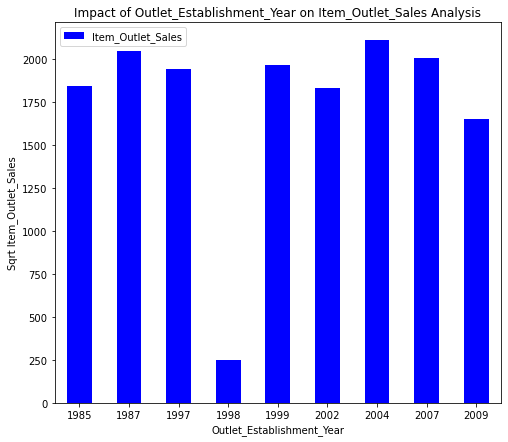

In [124]:
#Outlet_Establishment_Year vs Item_Outlet_Sales
Outlet_Establishment_Year_pivot = df_train.pivot_table(index='Outlet_Establishment_Year',
                                                              values='Item_Outlet_Sales',
                                                              aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(8,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales Analysis")
plt.xticks(rotation=0)
plt.show()


Observations:
    
-There is no distinguishable relationship between the year of establishment and output sales.
    
-Only in 1998 are sales lower (possibly due to fewer stores opening that year - no data on the number of stores opened each year)

Outlet_Type VS Item_Outlet_Sales

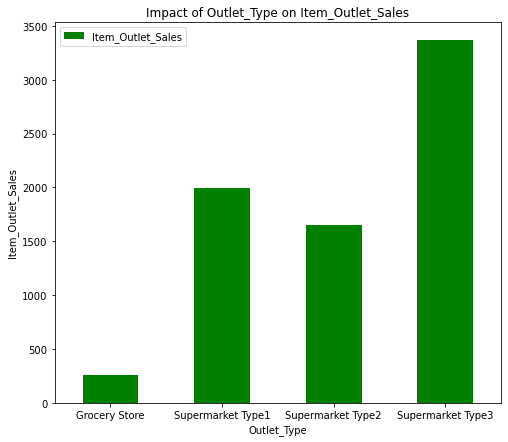

In [125]:
#  Outlet_Type VS Item_Outlet_Sales
Item_Type_pivot = df_train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='green',figsize=(8,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

- The Medium supermarket Type3 Outlet_Type has more sales than the others.

Outlet_Size vs Item_Outlet_Sales

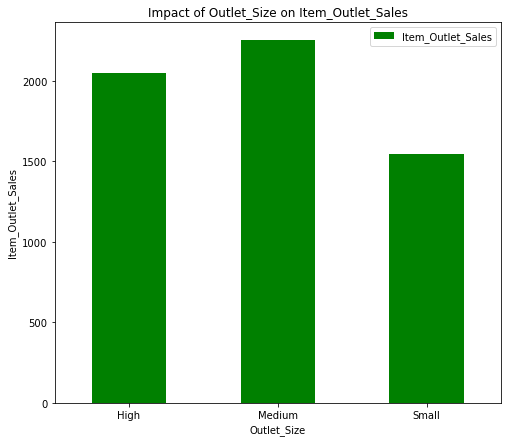

In [126]:
#Outlet_Size vs Item_Outlet_Sales
Outlet_Size_pivot = df_train.pivot_table(index='Outlet_Size',
                                                              values='Item_Outlet_Sales',
                                                              aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='green',figsize=(8,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

- The Medium store outlet has more sales than the High and Low size outlets.

Item_Fat_Content Vs Item_Outlet_Sales

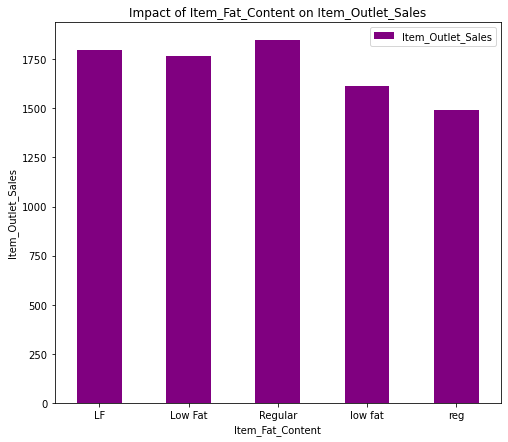

In [127]:
#Item_Fat_Content Vs Item_Outlet_Sales
Item_Type_pivot = df_train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='purple',figsize=(8,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Note:
    
    The low fat product sales is greater than the regular fat sales.

In [128]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [129]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

In [130]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [131]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

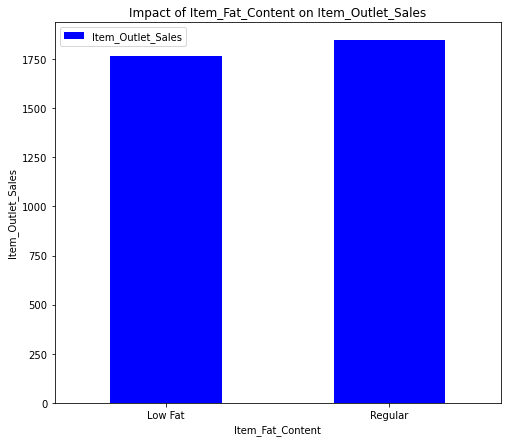

In [132]:
Item_Fat_Content_pivot = df_train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(8,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Outlet_Identifier vs Item_Outlet_Sales

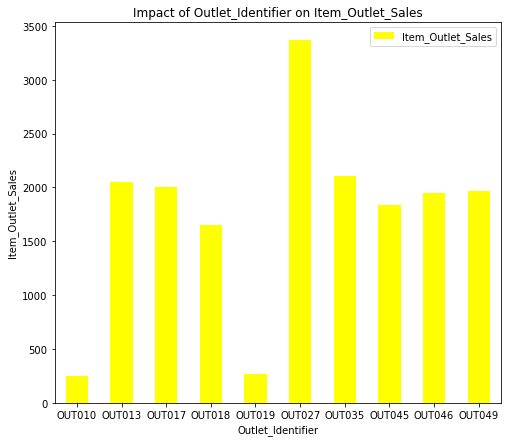

In [133]:
#Outlet_Identifier vs Item_Outlet_Sales
Outlet_Identifier_pivot = df_train.pivot_table(index='Outlet_Identifier',
                                                              values='Item_Outlet_Sales',
                                                              aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='yellow',figsize=(8,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

From the above diagram,Groceries "OUT010" and "OUT019" have the lowest expected sales results, followed by "OUT018"

Outlet_Location_Type vs Item_Outlet_Sales

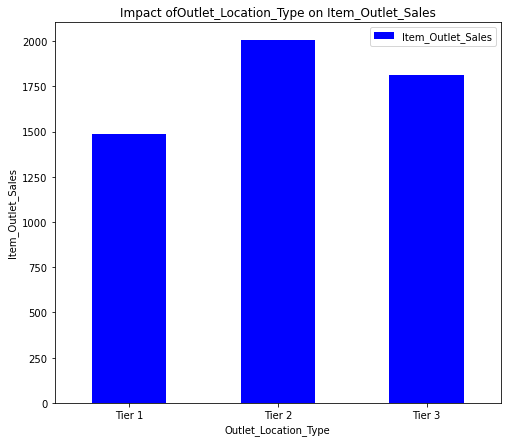

In [134]:
#Outlet_Location_Type vs Item_Outlet_Sales
Outlet_Location_Type_pivot = df_train.pivot_table(index='Outlet_Location_Type',
                                                              values='Item_Outlet_Sales',
                                                              aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(8,7))
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact ofOutlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

- we can observe that the sales of Tier2 > sales of Tier3 > Sales of Tier1

In [135]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


# Correlation between different attributes

Visualizing the data gives a better idea of what that means by placing data in a graphical context such as graphs. 
This allows us to understand the data more naturally, making it simpler to identify trends, trends, and 
anomalies in big datasets. 

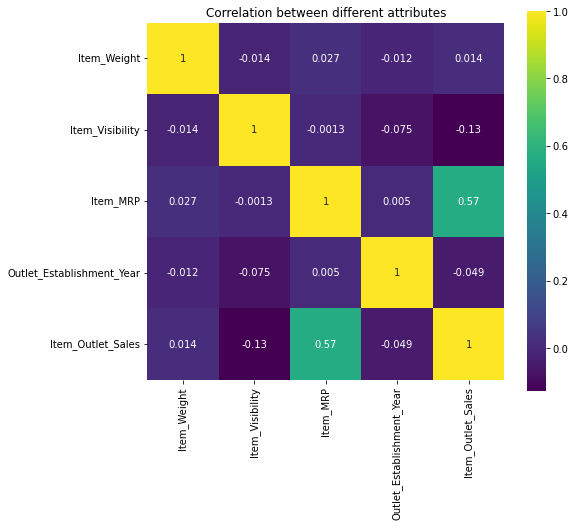

In [136]:
plt.figure(figsize=(8,7))
sns.heatmap(df_train.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

From the above HeatMap,

Item_visibility has lowest correlation with target variable.

Item_MRP has strong positive correlation with target variable. 

# Data Cleaning

Data cleaning is required to purify data and adapt it to a system's machine learning model, making the machine learning model more accurate and efficient. The first step in data cleaning is to collect the necessary dataset and then check for missing values once the dataset has been imported. Missed values must be corrected or the data will be difficult to access and maintain. Then, to correct the missing values, compute the mean of the column containing missing values and replace it with the measured mean.When the dataset is pre-processed, it is divided into train and test datasets. This dataset can now be used to train a machine learning algorithm to predict Item Outlet Sales against a variety of items, allowing retailers to create personalized offers for customers against specific products.

# Treating the Missing values

There are only two variables with missing values – Item_Weight and Outlet_Size.

# Item_Weight

From the plot,We saw that the item weight column is approximately normal, so we can replace the missing values with the column Mean.

In [137]:
df['Item_Weight'].mean() #replacing the NaN values with this mean

12.792854228644991

In [138]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True) #missing values are replaced with the mean using fillna function.

# Outlet_Size

We will fill in the missing values in Outlet Size with the most frequently occurring item, in this case Medium.

In [139]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [140]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [141]:
df.isnull().sum() #No null values in Outlet_Size

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [142]:
df_train.shape

(8523, 13)

In [143]:
df_test.shape

(5681, 12)

In [144]:
df.shape

(14204, 13)

# Feature Engineering

In the data exploration section, we looked into some nuances in the data. Let us proceed to resolving them and preparing our data for analysis. In this section, we will also create some new variables by modifying existing ones.

# Item_Visibility

We have noticed that the minimum value here is 0, which makes no practical sense. Consider it as a missing information and associate it with the product's low visibility.

In [145]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [146]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

# Outlet_Years

We wanted to create a new column that depicted a store's years of operation. This can be accomplished as follows:

In [147]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [148]:
df['Outlet_Years'] = 2013-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

# Item_Type

In [149]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Item types are either Food, Drinks or Non-Consumables

In [150]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

A closer look at each Item Identifier reveals that they begin with "FD", "DR" (Drinks), or "NC" (Non-Consumables)

To improve our analysis, we will create three new categories in addition to the existing 16 categories.

In [151]:
#Changing only the first 2 characters (category ID)

df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [152]:
#Renaming the categories:

df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

If a product is non-consumable then why associate a fat-content to them? We will remove it.
#Mark non-consumables as separate category in low_fat:

In [153]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Under normal circumstances, if a product is more visible, it is more likely to sell. Based on that hypothesis, we can calculate the importance of a product in a given store based on the average significance of the same product in all other stores.

In [154]:
Item_Visibility_Avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [155]:
Item_Visibility_Avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [156]:
function = lambda x: x['Item_Visibility']/Item_Visibility_Avg['Item_Visibility'][Item_Visibility_Avg.index == x['Item_Identifier']][0]
df['Item_Visibility_Avg'] = df.apply(function,axis=1).astype(float)

In [157]:
df['Item_Visibility_Avg'].describe()

count    14204.000000
mean         1.000000
std          0.348382
min          0.000000
25%          0.921522
50%          0.962037
75%          1.042007
max          3.010094
Name: Item_Visibility_Avg, dtype: float64

In [158]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,Item_Visibility_Avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,4,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,15,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,26,Non-Consumable,0.000000


# Categorical Variables Transformation

Therefore,scikit-learn only accepts numerical variables, I converted all nominal variable categories to numeric types. I also wanted Outlet Identifier to be a variable. So I coded a new variable called 'Outlet,' which is the same as Outlet Identifier. Because it will be required in the submission file, Outlet Identifier should be left alone.

We will use the LabelEncoder function to convert all categorical variables into numeric types (Values of 0 or 1) so that we can build models on them.

In [159]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
  df[i] = label.fit_transform(df[i])

In [160]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,Item_Visibility_Avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,14,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,4,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,14,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,15,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,26,2,0.000000,1


# One-Hot Coding of Categorical variables

The term "one-hot-coding" refers to the process of creating dummy variables, one for each category of a categorical variable. Item Fat Content, for example, has three categories: 'Low Fat,' 'Regular,' and 'Non-Edible.' One hot coding operation will remove this variable and create three new variables. Each will contain binary numbers 0 (if the category does not exist) and 1. (if category is present). This is possible with Pandas' 'get dummies' function.

In [161]:
#Dummy Variables:

df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_Avg          float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

We can see that all variables have been converted to floats, and each category has a new variable. Consider the three columns formed by Item Fat Content.

In [162]:
df[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


Therefore,we can notice that each row has only one column with the value 1, which corresponds to the category in the original variable.

# Exporting data

Data should be converted back into train and test data sets. Both of these should be exported as modified data sets so that they can be reused for multiple sessions.

In [163]:
#Droping the columns which are converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

# Model Building

In [164]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

In [165]:
#Droping the unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [166]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [167]:
X = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
Y = train['Item_Outlet_Sales']

In [168]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_Avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,14,0.931078,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,4,0.933420,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,14,0.960069,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,15,0.000000,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,26,0.000000,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [169]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [170]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [171]:
X_train.shape

(6392, 31)

In [172]:
X_train.tail()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_Avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
5734,9.395,0.286345,139.1838,15,1.464117,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5191,15.600,0.117575,75.6670,6,0.879677,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5390,17.600,0.018944,237.3590,11,1.001096,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
860,20.350,0.054363,117.9466,6,0.964144,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7270,16.350,0.016993,95.7410,16,0.929633,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [173]:
X_test.shape

(2131, 31)

In [174]:
Y_train.tail()

5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, dtype: float64

In [175]:
Y_test.tail()

4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, dtype: float64

In [176]:
Y_train.shape

(6392,)

In [177]:
Y_test.shape

(2131,)

# Linear Regression Model

In [178]:
lm = LinearRegression()

In [179]:
model = lm.fit(X_train,Y_train)
predictions = lm.predict(X_test)
predictions[:5]

array([1362.80792719,  703.90859258,  856.21656123, 4237.8455983 ,
       3352.78672996])

Plotting the Model

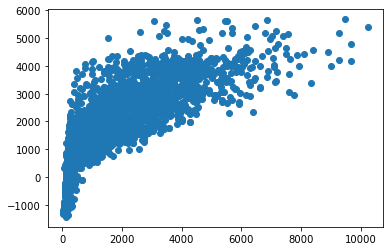

In [180]:
plt.scatter(Y_test,predictions)
plt.show()

In [181]:
#Accuracy of the Model
print("Linear Regression Model Score:",model.score(X_test,Y_test))

Linear Regression Model Score: 0.5693160178336899


In [182]:
original_values = Y_test
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(original_values,predictions))
print("Linear Regression Model R2 score: ",metrics.r2_score(original_values,predictions))
print("Linear Regression Model RMSE value: ", rmse)

Linear Regression Model R2 score:  0.5693160178336899
Linear Regression Model RMSE value:  1090.0675781890661


In [183]:
# Linear Regression with statsmodels
x = sm.add_constant(X_train)
Result = sm.OLS(Y_train,x).fit()
Result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     508.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:38:17   Log-Likelihood:                -54062.
No. Observations:                6392   AIC:                         1.082e+05
Df Residuals:                    6375   BIC:                         1.083e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -132.6356     20.374     -6.510      0.000    -172.575     -92.696
Item_Weight               -2.2237      3.396     -0.655      0.513      -8.882       4.434
Item_Visibility         -384.3979    310.214     -1.239      0.215    -992.521     223.726
Item_MRP                  15.6919      0.228     68.700      0.000      15.244      16.140
Outlet_Years              11.4370      2.060      5.551      0.000       7.398      15.476
Item_Visibility_Avg      -33.2030     53.246     -0.624      0.533    -137.582      71.176
Item_Fat_Content_0       -74.5212     17.774     -4.193      0.000    -109.363     -39.679
Item_Fat_Content_1       -45.8115     15.657     -2.926      0.003     -76.505     -15.118
Item_Fat_Content_2       -12.3028     20.511     -0.600      0.549     -52.510      27.905
Outlet_Location_Type_0  -162.1427     15.995    -10.137      0.000    -193.498    -130.788
Outlet_Location_Type_1    33.2021     17.776      1.868      0.062      -1.646      68.050
Outlet_Location_Type_2    -3.6949     18.665     -0.198      0.843     -40.284      32.894
Outlet_Size_0            -68.0192     13.167     -5.166      0.000     -93.830     -42.208
Outlet_Size_1             45.3303     19.253      2.354      0.019       7.588      83.073
Outlet_Size_2           -109.9467     18.104     -6.073      0.000    -145.436     -74.457
New_Item_type_0          -61.7332     31.221     -1.977      0.048    -122.937      -0.530
New_Item_type_1          -25.0909     23.355     -1.074      0.283     -70.875      20.694
New_Item_type_2          -45.8115     15.657     -2.926      0.003     -76.505     -15.118
Outlet_Type_0          -1113.2302     26.852    -41.457      0.000   -1165.870   -1060.590
Outlet_Type_1            263.7649     17.747     14.863      0.000     228.976     298.554
Outlet_Type_2             -0.2717     19.647     -0.014      0.989     -38.787      38.243
Outlet_Type_3            717.1014     17.624     40.689      0.000     682.553     751.650
Outlet_0                -652.5054     30.415    -21.453      0.000    -712.129    -592.882
Outlet_1                 -68.0192     13.167     -5.166      0.000     -93.830     -42.208
Outlet_2                  18.0832     34.224      0.528      0.597     -49.008      85.174
Outlet_3                  -0.2717     19.647     -0.014      0.989     -38.787      38.243
Outlet_4                -460.7248     22.415    -20.555      0.000    -504.665    -416.784
Outlet_5                 717.1014     17.624     40.689      0.000     682.553     751.650
Outlet_6                 191.6129     26.636      7.194      0.000     139.397     243.829
Outlet_7                -176.4941     32.701     -5.397      0.000    -240.599    -112.389
Outlet_8                 159.1653     30.045      5.298      0.000     100.268  

In [184]:
Predictions = Result.predict(x)
Predictions.head()

4776    3805.972024
7510    2703.771678
5828    2622.066178
5327    1484.632181
4810    1878.138863
dtype: float64

In [185]:
Predictions_DF = pd.DataFrame({"Predictions":Predictions})
joined = x.join(Predictions_DF)
joined.head()

,const,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_Avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Predictions
4776,1.0,16.350,0.029565,256.4646,4,1.003140,0,1,0,0,...,0,0,1,0,0,0,0,0,0,3805.972024
7510,1.0,15.250,0.000000,179.7660,4,0.000000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2703.771678
5828,1.0,12.350,0.158716,157.2946,14,1.029192,0,0,1,1,...,0,0,0,0,0,0,0,0,1,2622.066178
5327,1.0,7.975,0.014628,82.3250,9,0.998881,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1484.632181
4810,1.0,19.350,0.016645,120.9098,11,0.876503,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1878.138863


Linear Regression Model with Cross Validation

In [186]:
# Performing 6-fold cross validation
Score = cross_val_score(model,X,Y,cv=5)
print("Linear Regression Model Cross Validated Score: ",Score)

Linear Regression Model Cross Validated Score:  [0.57118971 0.55527549 0.54760813 0.56585116 0.56484981]


In [187]:
#Predicting with cross_val_predict
predictions = cross_val_predict(model,X,Y,cv=6)
predictions[:5]

array([4010.25243997,  587.58661364, 2338.51646505, 1042.84768269,
        982.61412886])

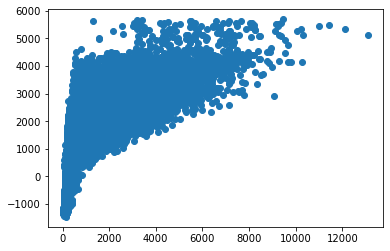

In [188]:
plt.scatter(Y,predictions)
plt.show()

In [189]:
accuracy = metrics.r2_score(Y,predictions)
print("Linear Regression Model R2 with Cross Validation: ",accuracy)

Linear Regression Model R2 with Cross Validation:  0.5613484407669818


In [191]:
rmse = np.sqrt(metrics.mean_squared_error(Y,predictions))
print("Linear Regression Model RMSE with Cross Validation:",rmse)

Linear Regression Model RMSE with Cross Validation: 1130.1616188829596


# Decision Tree Model

In [192]:
tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,Y_train)
tree_pred = tree.predict(X_test)
tree_pred[:5]

array([1141.52015273,  659.5803528 ,  659.5803528 , 5204.69368986,
       3048.67928523])

In [193]:
Results = pd.DataFrame({'Actual':Y_test,'Predicted':tree_pred})
Results.head()

,Actual,Predicted
7503,1743.0644,1141.520153
2957,356.8688,659.580353
7031,377.5086,659.580353
1084,5778.4782,5204.693690
856,2356.9320,3048.679285


In [194]:
print('R2 Score of Decision Tree Model:' , metrics.r2_score(Y_test,tree_pred))
print('Mean Absolute Error of Decision Tree Model:', metrics.mean_absolute_error(Y_test, tree_pred))
print('Mean Squared Error of Decision Tree Model:', metrics.mean_squared_error(Y_test, tree_pred))
print('Root Mean Squared Error of Decision Tree Model:', np.sqrt(metrics.mean_squared_error(Y_test, tree_pred)))

R2 Score of Decision Tree Model: 0.5893639233847621
Mean Absolute Error of Decision Tree Model: 743.0158588866354
Mean Squared Error of Decision Tree Model: 1132935.6089354747
Root Mean Squared Error of Decision Tree Model: 1064.3944799441017


# RandomForest Model

In [195]:
rf = RandomForestRegressor(random_state=43)

In [196]:
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=43)

In [197]:
predictions = rf.predict(X_test)
predictions[:5]

array([ 802.25571 ,  947.160422,  785.630684, 4729.730014, 2750.240034])

In [198]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test,predictions))
print("Random Forest Model RMSE :",rmse)

Random Forest Model RMSE : 1100.474842761797


In [199]:
print("Random Forest Model R2 Score:",metrics.r2_score(Y_test,predictions))

Random Forest Model R2 Score: 0.5610529724532947


In [200]:
results = pd.DataFrame({'Actual':Y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,802.255710
2957,356.8688,947.160422
7031,377.5086,785.630684
1084,5778.4782,4729.730014
856,2356.9320,2750.240034


# Results:

Linear Regression Model RMSE value:  1090.0675781890661

Decision Tree Model RMSE value : 1064.3944799441017
    
Random Forest Model RMSE : 1100.474842761797

- Outlet_Type and Item_MRP are the key factors affecting the Outlet_Sales.

- Random Forest is the most accurate Predicted model